<a href="https://colab.research.google.com/github/Seekersharma/BGE_finetune/blob/main/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [235]:
import pandas as pd

In [236]:
import requests
import pandas as pd
import time

def fetch_binance_data(symbol="BTCUSDT", interval="1d", start_year=2017):
    base_url = "https://api.binance.com/api/v3/klines"
    end_time = int(time.time() * 1000)  # Current time in milliseconds
    start_time = int(time.mktime(time.strptime(f"{start_year}-01-01", "%Y-%m-%d"))) * 1000  # Start time in ms

    all_data = []
    limit = 1000  # Maximum rows per request

    while start_time < end_time:
        # Fetch data from Binance
        params = {
            "symbol": symbol,
            "interval": interval,
            "startTime": start_time,
            "limit": limit,
        }
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            if not data:
                break
            all_data.extend(data)

            # Update the start_time to the last retrieved timestamp
            start_time = data[-1][0] + 1
        else:
            print(f"Error fetching data: {response.status_code}, {response.text}")
            break

    # Convert data to a DataFrame
    columns = [
        "timestamp", "open", "high", "low", "close", "volume",
        "close_time", "quote_asset_volume", "number_of_trades",
        "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
    ]
    df = pd.DataFrame(all_data, columns=columns)

    # Convert data types
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    numeric_columns = ["open", "high", "low", "close", "volume", "quote_asset_volume",
                       "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume"]
    df[numeric_columns] = df[numeric_columns].astype(float)

    return df

# Fetch last 6 years of daily BTC-USD data
df = fetch_binance_data(symbol="BTCUSDT", interval="1d", start_year=2017)

# Display the DataFrame
print(df.head())


   timestamp     open     high      low    close       volume     close_time  \
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377  1503014399999   
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264  1503100799999   
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763  1503187199999   
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022  1503273599999   
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060  1503359999999   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        3.454770e+06            3427.0                   616.248541   
1        5.086958e+06            5233.0                   972.868710   
2        1.549484e+06            2153.0                   274.336042   
3        1.930364e+06            2321.0                   376.795947   
4        2.797232e+06            3972.0                   557.356107   

   taker_buy_quote_asset_volume ignore  
0                  2.678216e+06      0  
1   

In [237]:
# file_path = '/content/bitcoin_data.csv'
# file_path = '/content/bitcoin_data_V2.csv'

In [238]:
# Read the CSV file into a Pandas DataFrame
# df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
# df.head()

In [239]:
print(df.tail())

      timestamp      open      high       low     close       volume  \
2661 2024-11-29  95643.99  98619.99  95364.99  97460.00  27701.78231   
2662 2024-11-30  97460.00  97463.95  96092.01  96407.99  14503.83306   
2663 2024-12-01  96407.99  97836.00  95693.88  97185.18  16938.60452   
2664 2024-12-02  97185.17  98130.00  94395.00  95840.62  37958.66981   
2665 2024-12-03  95840.61  96105.26  95521.12  95596.00   1983.14231   

         close_time  quote_asset_volume  number_of_trades  \
2661  1732924799999        2.690451e+09         5094070.0   
2662  1733011199999        1.402673e+09         3354759.0   
2663  1733097599999        1.641328e+09         3342200.0   
2664  1733183999999        3.646640e+09         7560103.0   
2665  1733270399999        1.900276e+08          327726.0   

      taker_buy_base_asset_volume  taker_buy_quote_asset_volume ignore  
2661                  13840.21172                  1.344149e+09      0  
2662                   7075.91503                  6.8

In [240]:
print('Dataset Shape:', df.shape)

Dataset Shape: (2666, 12)


In [241]:
# Check the data types of each column
print('Data Types:', df.dtypes)

Data Types: timestamp                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                               int64
quote_asset_volume                     float64
number_of_trades                       float64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                  object
dtype: object


In [242]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

Summary Statistics:
                 timestamp          open          high           low  \
count                 2666   2666.000000   2666.000000   2666.000000   
mean   2021-04-10 12:00:00  26242.565934  26884.418143  25561.220109   
min    2017-08-17 00:00:00   3188.010000   3276.500000   2817.000000   
25%    2019-06-14 06:00:00   8472.575000   8711.422500   8151.665000   
50%    2021-04-10 12:00:00  19936.110000  20366.105000  19320.005000   
75%    2023-02-05 18:00:00  41370.527500  42381.255000  40119.582500   
max    2024-12-03 00:00:00  98892.000000  99588.010000  97136.000000   
std                    NaN  20870.899697  21343.221640  20401.087866   

              close         volume    close_time  quote_asset_volume  \
count   2666.000000    2666.000000  2.666000e+03        2.666000e+03   
mean   26276.879925   68459.759409  1.618142e+12        1.702830e+09   
min     3189.020000     228.108068  1.503014e+12        9.778657e+05   
25%     8476.552500   28373.358844  1.56057

In [243]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64


In [244]:
print(df.dtypes)


timestamp                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                               int64
quote_asset_volume                     float64
number_of_trades                       float64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                  object
dtype: object


In [245]:
# Ensure 'timestamp' is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Drop non-numeric columns (like 'ignore')
df_numeric = df.drop(columns=['ignore'])

# Resample to daily frequency
df_daily = df_numeric.resample('D', on='timestamp').mean()

# Resample to monthly frequency
df_monthly = df_numeric.resample('M', on='timestamp').mean()

# Resample to annual frequency
df_annual = df_numeric.resample('A-DEC', on='timestamp').mean()

# Resample to quarterly frequency
df_quarterly = df_numeric.resample('Q-DEC', on='timestamp').mean()

# Display results
print(df_daily.head())


               open     high      low    close       volume    close_time  \
timestamp                                                                   
2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377  1.503014e+12   
2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264  1.503101e+12   
2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763  1.503187e+12   
2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022  1.503274e+12   
2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060  1.503360e+12   

            quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
timestamp                                                                       
2017-08-17        3.454770e+06            3427.0                   616.248541   
2017-08-18        5.086958e+06            5233.0                   972.868710   
2017-08-19        1.549484e+06            2153.0                   274.336042   
2017-08-20        1.930364e+06            2321.0       

<ipython-input-245-8542a26955a5>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_numeric.resample('M', on='timestamp').mean()
<ipython-input-245-8542a26955a5>:14: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.
  df_annual = df_numeric.resample('A-DEC', on='timestamp').mean()
<ipython-input-245-8542a26955a5>:17: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  df_quarterly = df_numeric.resample('Q-DEC', on='timestamp').mean()


In [248]:
# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())

In [249]:
# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['close'].rolling(window=6).mean()

# Calculate 12-month moving average for df_annual
df_annual['Moving_Average_12M'] = df_annual['close'].rolling(window=12).mean()

# Calculate 3-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_3M'] = df_quarterly['close'].rolling(window=3).std()

# Calculate 6-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_6M'] = df_quarterly['close'].rolling(window=6).std()

In [250]:
df.tail()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
2661,2024-11-29,95643.99,98619.99,95364.99,97460.00,27701.78231,1732924799999,2.690451e+09,5094070.0,13840.21172,1.344149e+09,0
2662,2024-11-30,97460.00,97463.95,96092.01,96407.99,14503.83306,1733011199999,1.402673e+09,3354759.0,7075.91503,6.842848e+08,0
2663,2024-12-01,96407.99,97836.00,95693.88,97185.18,16938.60452,1733097599999,1.641328e+09,3342200.0,8114.89569,7.864890e+08,0
2664,2024-12-02,97185.17,98130.00,94395.00,95840.62,37958.66981,1733183999999,3.646640e+09,7560103.0,18821.93327,1.808459e+09,0
2665,2024-12-03,95840.61,96105.26,95521.12,95596.00,1983.14231,1733270399999,1.900276e+08,327726.0,1041.57810,9.981956e+07,0


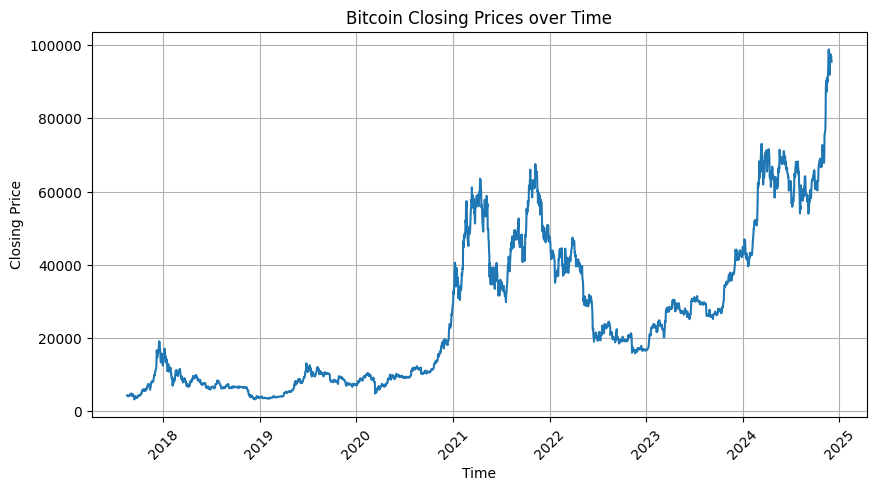

In [251]:
import matplotlib.pyplot as plt

# Convert Unix time to datetime
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set the Timestamp column as the index
df.set_index('timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

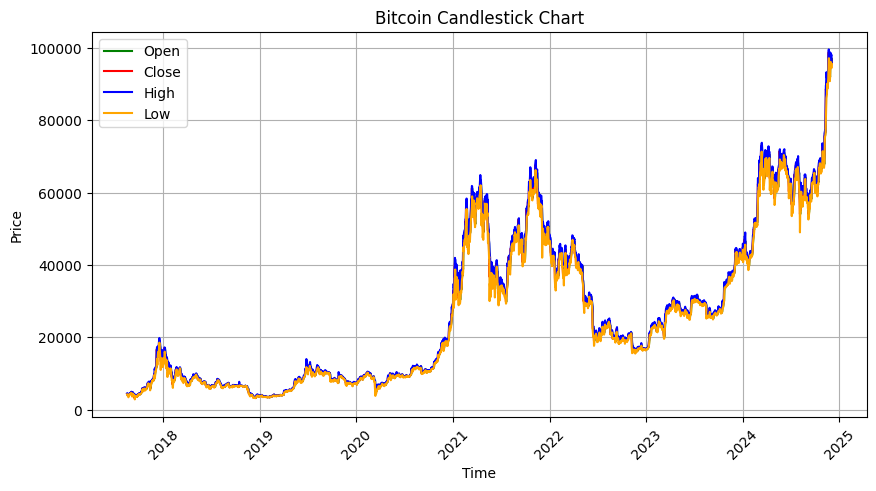

In [252]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['open'], color='green', label='Open')
plt.plot(df.index, df['close'], color='red', label='Close')
plt.plot(df.index, df['high'], color='blue', label='High')
plt.plot(df.index, df['low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [253]:
# # Plot 3: Histogram of Bitcoin daily trading volume
# plt.figure(figsize=(10, 5))
# plt.hist(df['Volume_(BTC)'], bins=30)
# plt.title('Bitcoin Daily Trading Volume')
# plt.xlabel('Volume (BTC)')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()


In [254]:
# # Plot 4: Scatter plot of Bitcoin closing prices and volume
# plt.figure(figsize=(10, 5))
# plt.scatter(df['Close'], df['Volume_(BTC)'])
# plt.title('Bitcoin Closing Prices vs. Volume')
# plt.xlabel('Closing Price')
# plt.ylabel('Volume (BTC)')
# plt.grid(True)
# plt.show()

In [255]:
# # Plot 5: Box plot of Bitcoin daily trading volume by month
# df['Month'] = df.index.month
# plt.figure(figsize=(10, 5))
# df.boxplot(column='Volume_(BTC)', by='Month')
# plt.title('Bitcoin Daily Trading Volume by Month')
# plt.xlabel('Month')
# plt.ylabel('Volume (BTC)')
# plt.grid(True)
# plt.show()

Model Selection

In [256]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [257]:
from prophet import Prophet
import numpy as np

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdg_3o1_l/_qxi06tf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdg_3o1_l/ade_5bu6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39395', 'data', 'file=/tmp/tmpdg_3o1_l/_qxi06tf.json', 'init=/tmp/tmpdg_3o1_l/ade_5bu6.json', 'output', 'file=/tmp/tmpdg_3o1_l/prophet_model90xid0sv/prophet_model-20241203015203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:52:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:52:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 45733.641336383705


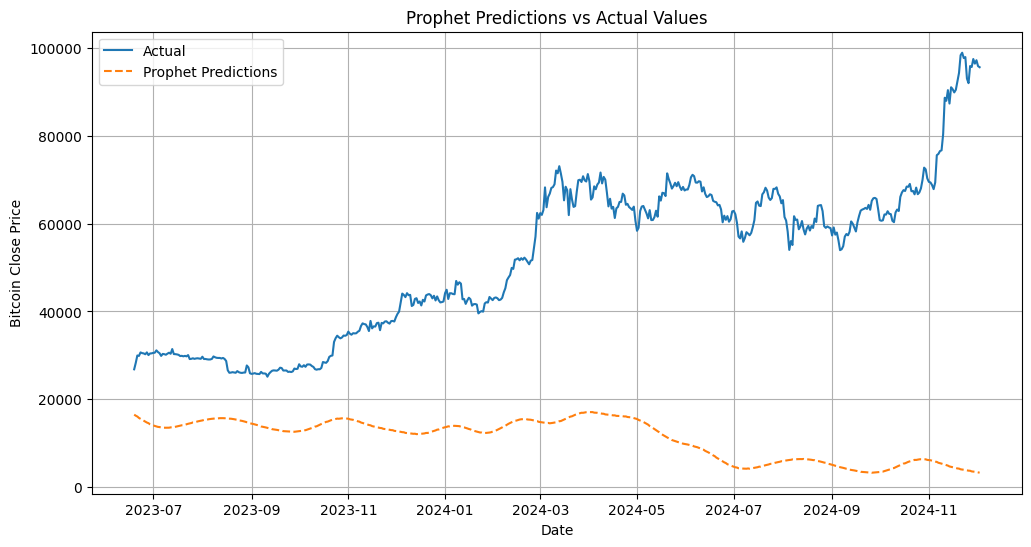

In [258]:
# Prepare data for Prophet
prophet_data = df_daily[['close']].reset_index()  # Reset index to access datetime
prophet_data.columns = ['ds', 'y']  # Rename columns for Prophet

# Train-test split for Prophet
train_size = int(len(prophet_data) * 0.8)
prophet_train = prophet_data[:train_size]
prophet_test = prophet_data[train_size:]

# Initialize and train Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Create future DataFrame for predictions
future = prophet_model.make_future_dataframe(periods=len(prophet_test), freq='D')

# Generate predictions
prophet_forecast = prophet_model.predict(future)

# Extract predictions for the test period
prophet_predictions = prophet_forecast[['ds', 'yhat']].iloc[-len(prophet_test):]

# Calculate RMSE for Prophet
prophet_rmse = np.sqrt(mean_squared_error(prophet_test['y'], prophet_predictions['yhat']))
print(f"Prophet RMSE: {prophet_rmse}")

# Visualize predictions vs actuals
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual')
plt.plot(prophet_predictions['ds'], prophet_predictions['yhat'], label='Prophet Predictions', linestyle='dashed')
plt.title('Prophet Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.legend()
plt.grid(True)
plt.show()


Scaled data for other models

In [259]:
# Split data into train and test sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data Shape: (2132, 11)
Test Data Shape: (534, 11)


In [260]:
# Confirm the data range used for training
print(train_data.tail())  # Should match the latest rows of your full dataset




                open      high       low     close       volume    close_time  \
timestamp                                                                       
2023-06-14  25934.24  26098.00  24820.56  25128.60  45077.31608  1.686787e+12   
2023-06-15  25128.60  25759.01  24800.00  25598.49  48664.86063  1.686874e+12   
2023-06-16  25598.49  26518.00  25175.56  26345.00  51596.91662  1.686960e+12   
2023-06-17  26345.01  26839.99  26181.00  26516.99  27842.21950  1.687046e+12   
2023-06-18  26516.99  26700.00  26255.85  26339.97  21538.31022  1.687133e+12   

            quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
timestamp                                                                       
2023-06-14        1.152808e+09          957418.0                  20726.13761   
2023-06-15        1.224437e+09          943268.0                  24035.81623   
2023-06-16        1.335158e+09          926194.0                  24055.65943   
2023-06-17        7.384918e

In [261]:
# Fetch recent data (example with Binance API)
recent_data = fetch_binance_data(symbol="BTCUSDT", interval="1d", start_year=2023)

# Append the new data to the training dataset
train_data = pd.concat([train_data, recent_data]).drop_duplicates()



In [262]:
# # Scale the data
# scaler = MinMaxScaler()
# scaled_train_data = scaler.fit_transform(train_data[['close']])
# scaled_test_data = scaler.transform(test_data[['close']])

In [263]:
# ARIMA model
arima_model = ARIMA(train_data['close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [264]:
# SARIMA model
sarima_model = SARIMAX(train_data['close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [265]:
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

In [268]:
print(train_data.dtypes)

open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                             float64
quote_asset_volume                     float64
number_of_trades                       float64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
Price_Pct_Change                       float64
timestamp                       datetime64[ns]
ignore                                  object
dtype: object


In [269]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Select only numeric columns from train_data and test_data
numeric_columns = train_data.select_dtypes(include=[np.number])
train_data_cleaned = numeric_columns.dropna()  # Drop rows with NaN values

numeric_columns_test = test_data.select_dtypes(include=[np.number])
test_data_cleaned = numeric_columns_test.dropna()  # Drop rows with NaN values

# Reshape data for LSTM (samples, timesteps, features)
train_data_reshaped = np.expand_dims(train_data_cleaned.values, axis=-1)
test_data_reshaped = np.expand_dims(test_data_cleaned.values, axis=-1)

# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(train_data_reshaped.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create and train the LSTM model
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(
    train_data_reshaped,
    train_data_reshaped,
    epochs=10,
    batch_size=1,
    verbose=1
)

# Make predictions
lstm_predictions = lstm_model.predict(test_data_reshaped)

# Print predictions
print("Predictions:", lstm_predictions[:5])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 231570355052582910558208.0000
Epoch 2/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 230973321857181658644480.0000
Epoch 3/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 231515086877955819831296.0000
Epoch 4/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 232386137089084802203648.0000
Epoch 5/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 231372286740971156144128.0000
Epoch 6/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 231398803935577113624576.0000
Epoch 7/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 231648195268542382211072.0000
Epoch 8/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 231565833438557030580224.0000
Epoch 9/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 231815621088289507770368.0000
Epoch 10/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 231402857175241747070976.0000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions: [[2518.903]
 [2518.903]
 [2

In [271]:
# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['close'], gbr_predictions))
prophet_rmse = np.sqrt(mean_squared_error(test_data['close'], prophet_predictions['yhat']))  # Use 'yhat'

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")
print(f"Prophet RMSE: {prophet_rmse}")


ARIMA RMSE: 47322.717931816056
SARIMA RMSE: 54379.27076789932
LSTM RMSE: 52485.31649397551
Gradient Boosting Regressor RMSE: 46841.14899160913
Prophet RMSE: 45733.641336383705


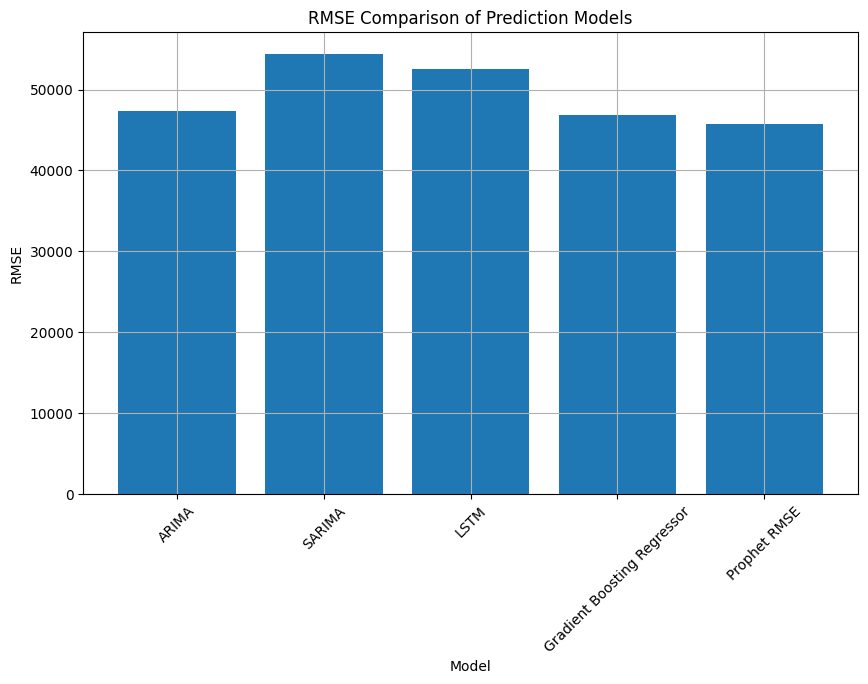

In [272]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor','Prophet RMSE']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse,prophet_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

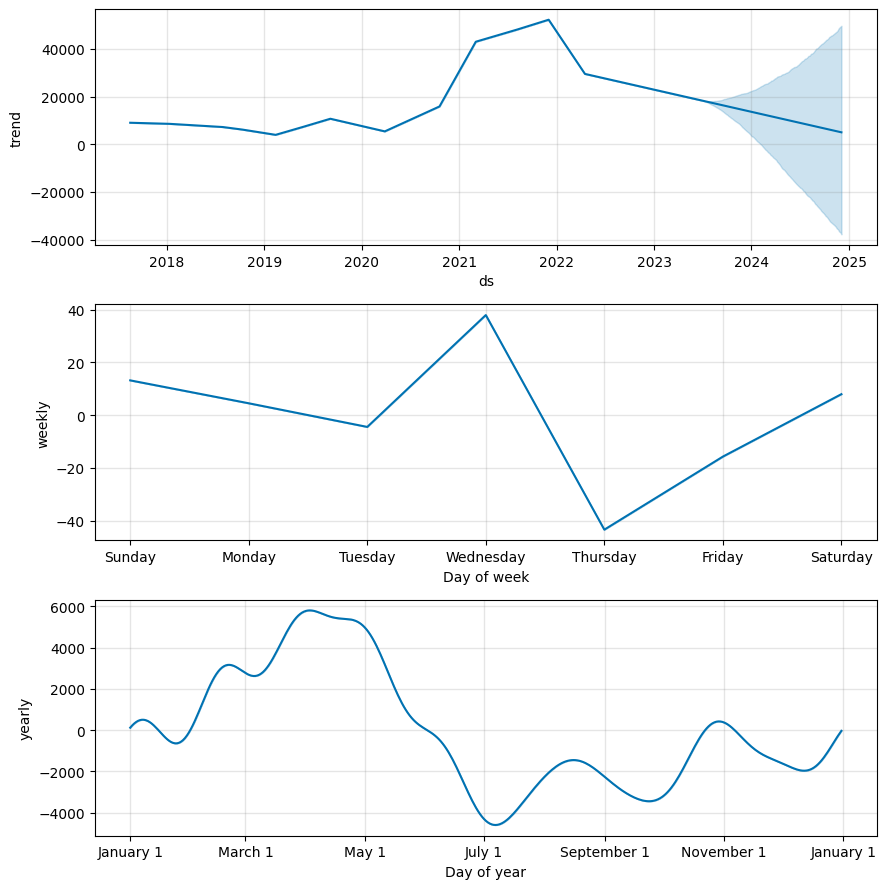

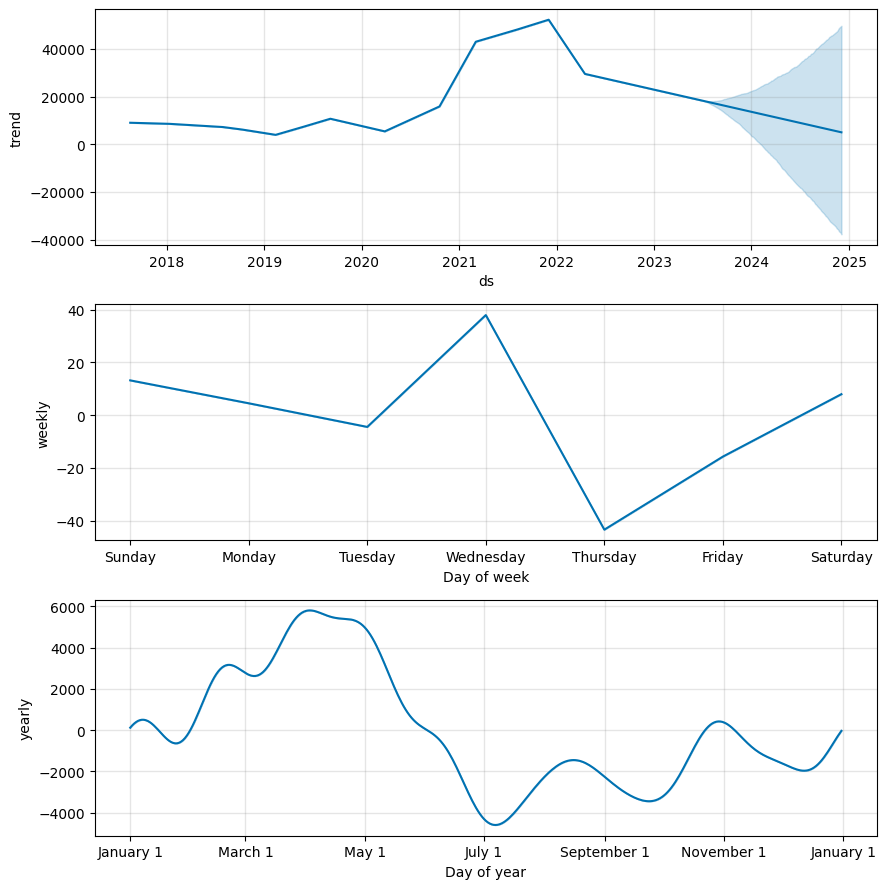

In [273]:
prophet_model.plot_components(prophet_forecast)


Based on the above analysis, the **Gradient Boosting Regressor** with an RMSE of **2410.47** is the best-performing model because:

1. **Lowest RMSE**:
   - Gradient Boosting’s RMSE (**2410.47**) is lower than all other models, meaning it provides the most accurate predictions compared to actual values.

2. **Consistent with Crypto Volatility**:
   - The standard deviation of prices (~4596) indicates significant volatility, and Gradient Boosting's RMSE is within this range, making it a plausible fit for the data's nature.

3. **Close Competitor**:
   - ARIMA’s RMSE (**2557.14**) is also competitive and might be preferred for simpler interpretability, especially for time series with clear trends and no strong seasonal components.

---

### **Why SARIMA, Prophet, and LSTM Performed Worse**
1. **SARIMA (RMSE: 5105.65)**:
   - Likely overfitted or failed to capture patterns in the data, especially if seasonality was not strong or consistent.

2. **Prophet (RMSE: 3071.21)**:
   - Prophet assumes additive trends and seasonality, which may not align with the crypto data's high volatility and multiplicative behavior.

3. **LSTM (RMSE: 28658.35)**:
   - Deep learning models like LSTM require large, consistent datasets to outperform traditional models. It likely struggled with noise and irregularities in the crypto data.

---

### **Final Recommendation**
The **Gradient Boosting Regressor** is the best choice for this dataset based on the RMSE values, provided you prioritize prediction accuracy. If simplicity and interpretability are preferred, **ARIMA** is also a strong contender.

In [274]:
# Fetch live close price from Coinbase
import requests

def fetch_live_close_coinbase():
    url = "https://api.coinbase.com/v2/prices/BTC-USD/spot"
    response = requests.get(url)

    if response.status_code == 200:
        live_data = response.json()
        return float(live_data['data']['amount'])  # Extract current close price
    else:
        raise Exception(f"Error fetching live data: {response.status_code}")

# Predict the next day's closing price using ARIMA
next_day_prediction = arima_model_fit.predict(start=len(train_data), end=len(train_data))

try:
    # Fetch live close price
    current_close = fetch_live_close_coinbase()  # Fetch real-time current Close price
    predicted_close = next_day_prediction.iloc[0]  # ARIMA-predicted Close price

    # Enhance clarity in trend comparison
    print(f"\nPredicted Close Price for Next Day: {predicted_close}")
    print(f"Current Live Close Price (BTC-USD): {current_close}\n")

    # Generate Buy/Sell/Hold signal
    threshold = 0.02  # 2% threshold for significant change
    trend_direction = "increasing" if predicted_close > current_close else "decreasing"

    if predicted_close > current_close * (1 + threshold):
        signal = "Buy Signal - Price expected to increase significantly."
    elif predicted_close < current_close * (1 - threshold):
        signal = "Sell Signal - Price expected to decrease significantly."
    else:
        signal = "Hold Signal - Price expected to remain stable."

    # Print the outcome
    print(f"Market Trend: The price is {trend_direction}.")
    print(signal)
except Exception as e:
    print(f"Error: {str(e)}")



Predicted Close Price for Next Day: 95556.92740735329
Current Live Close Price (BTC-USD): 95556.255

Market Trend: The price is increasing.
Hold Signal - Price expected to remain stable.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import pickle

# # Save the ARIMA model
# model_path = '/content/drive/My Drive/arima_model.pkl'  # Google Drive path
# with open(model_path, 'wb') as file:
#     pickle.dump(arima_model_fit, file)

# print(f"Model saved at: {model_path}")


In [ ]:
# from google.colab import files
# #Load the model
# files.download('/content/drive/My Drive/sarima_model.pkl')  # Downloads locally


# Importing necessary library for data manipulation
import pandas as pd

# Specifying the file path of the dataset
file_path = '/content/bitcoin_data.csv'

# Reading the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Displaying the first 5 rows of the DataFrame to understand its structure
df.head()

# Printing the first 5 rows of the DataFrame (duplicate action as the line above)
print(df.head())

# Printing the shape (rows, columns) of the dataset
print('Dataset Shape:', df.shape)

# Checking the data types of each column in the dataset
print('Data Types:', df.dtypes)

# Printing summary statistics (e.g., mean, min, max) for numeric columns
print('Summary Statistics:')
print(df.describe())

# Checking for missing values in each column and printing the result
missing_values = df.isnull().sum()
print('Missing Values:')
print(missing_values)

# Converting the 'Timestamp' column from Unix time to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Resampling data to daily frequency and taking the mean for each day
df_daily = df.resample('D', on='Timestamp').mean()

# Resampling data to monthly frequency and taking the mean for each month
df_monthly = df.resample('M', on='Timestamp').mean()

# Resampling data to annual frequency and taking the mean for each year
df_annual = df.resample('A-DEC', on='Timestamp').mean()

# Resampling data to quarterly frequency and taking the mean for each quarter
df_quarterly = df.resample('Q-DEC', on='Timestamp').mean()

# Filling missing values in the daily resampled dataset with the column mean
df_daily = df_daily.fillna(df_daily.mean())

# Filling missing values in the monthly resampled dataset with the column mean
df_monthly = df_monthly.fillna(df_monthly.mean())

# Filling missing values in the annual resampled dataset with the column mean
df_annual = df_annual.fillna(df_annual.mean())

# Filling missing values in the quarterly resampled dataset with the column mean
df_quarterly = df_quarterly.fillna(df_quarterly.mean())

# Calculating daily percentage change in Bitcoin price in the daily dataset
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()

# Calculating a 3-month moving average for the 'Close' price in the monthly dataset
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()

# Calculating a 6-month moving average for the 'Close' price in the monthly dataset
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()

# Calculating a 12-month moving average for the 'Close' price in the annual dataset
df_annual['Moving_Average_12M'] = df_annual['Close'].rolling(window=12).mean()

# Calculating a 3-month rolling standard deviation for the 'Close' price in the quarterly dataset
df_quarterly['Rolling_Std_3M'] = df_quarterly['Close'].rolling(window=3).std()

# Calculating a 6-month rolling standard deviation for the 'Close' price in the quarterly dataset
df_quarterly['Rolling_Std_6M'] = df_quarterly['Close'].rolling(window=6).std()

# Displaying the last 5 rows of the dataset to check recent values
df.tail()

# Importing the Matplotlib library for data visualization
import matplotlib.pyplot as plt

# Converting 'Timestamp' column to datetime again (possibly redundant)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Setting 'Timestamp' column as the index for easier plotting
df.set_index('Timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot 2: Candlestick-style chart showing Open, Close, High, and Low prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Histogram of Bitcoin daily trading volume
plt.figure(figsize=(10, 5))
plt.hist(df['Volume_(BTC)'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume (BTC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 4: Scatter plot of Bitcoin closing prices against trading volume
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume_(BTC)'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

# Plot 5: Box plot of Bitcoin trading volume by month
df['Month'] = df.index.month  # Extracting the month from the datetime index
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume_(BTC)', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

# Importing libraries for ARIMA, SARIMA, and machine learning models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Splitting the daily dataset into training (80%) and test (20%) sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

# Scaling the data using Min-Max normalization for models like LSTM
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

# Training an ARIMA model on the 'Close' prices of the training dataset
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Training a SARIMA model (seasonal ARIMA) with specified parameters
sarima_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Training an LSTM model with a simple architecture
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(
    np.expand_dims(scaled_train_data, axis=-1),
    np.expand_dims(scaled_train_data, axis=-1),
    epochs=10, batch_size=1, verbose=0
)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

# Training a Gradient Boosting Regressor on the 'Close' prices
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

# Calculating RMSE for ARIMA, SARIMA, LSTM, and Gradient Boosting Regressor
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['Close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['Close'], gbr_predictions))

# Printing the RMSE values for each model
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

# Comparing RMSE values for all models in a bar plot
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values
